##### Copyright 2022 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
#@title Copyright 2022 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/hub/tutorials/hrnet_semantic_segmentation"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org で表示</a></td>
  <td>     <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/hub/tutorials/hrnet_semantic_segmentation.ipynb">     <img src="https://www.tensorflow.org/images/colab_logo_32px.png">     Google Colab で実行</a>
</td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ja/hub/tutorials/hrnet_semantic_segmentation.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub でソースを表示</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ja/hub/tutorials/hrnet_semantic_segmentation.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">ノートブックをダウンロード</a></td>
  <td><a href="https://tfhub.dev/google/HRNet/"><img src="https://www.tensorflow.org/images/hub_logo_32px.png">TF Hub モデル</a></td>
</table>

# セマンティックセグメンテーションの HRNet ベースモデル

このノートブックでは、以下について説明します。

- 異なるセマンティックセグメンテーション データセットで事前にトレーニングした 17 個の HTNet モデルから 1 つを選択して読み込む
- 推論を実行して、モデルヘッドのモデルバックボーンと予測から特徴量を抽出する

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

2024-01-11 18:41:42.816821: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 18:41:42.816870: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 18:41:42.818401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## TensorFlow Hub からモデルを読み込む

ここでは、事前トレーニング済みの読み込み用の HRNet モデルを選択できます。モデルの違いは使用されたトレーニングデータセットの違いです。トレーニングデータセット（dataset_output_classes）に含まれるクラスの数に応じて異なる次元を持つモデルヘッドを除き、すべてのモデルに同じアーキテクチャが使用されています。データセットの多様性についての詳細は、上記のリンクと[影響要因データセットコレクション](https://github.com/google-research/google-research/tree/master/factors_of_influence)をご覧ください。

In [3]:
#@title Choose a pre-trained HRNet model to load.

hrnet_model_name = 'ade20k-hrnetv2-w48/1'  #@param ["ade20k-hrnetv2-w48/1", "isprs-hrnetv2-w48/1", "vkitti2-hrnetv2-w48/1", "vgallery-hrnetv2-w48/1", "sunrgbd-hrnetv2-w48/1", "suim-hrnetv2-w48/1", "scannet-hrnetv2-w48/1", "pvoc-hrnetv2-w48/1", "msegpcontext-hrnetv2-w48/1", "mapillary-hrnetv2-w48/1", "kitti-hrnetv2-w48/1", "isaid-hrnetv2-w48/1", "idd-hrnetv2-w48/1", "coco-hrnetv2-w48/1", "city-hrnetv2-w48/1", "camvid-hrnetv2-w48/1", "bdd-hrnetv2-w48/1"]

tfhub_model_name = 'https://tfhub.dev/google/HRNet/' + hrnet_model_name

print('HRNet model selected           :', tfhub_model_name)

HRNet model selected           : https://tfhub.dev/google/HRNet/ade20k-hrnetv2-w48/1


In [4]:
hrnet_model = hub.load(tfhub_model_name)

print('HRNet model loaded           :', tfhub_model_name)

HRNet model loaded           : https://tfhub.dev/google/HRNet/ade20k-hrnetv2-w48/1


## 画像を読み込んで推論を実行する

ここでは、画像から特徴量と予測を抽出する推論の実行方法を紹介します。画像は、scene150 データセットから取得されたものです。

トレーニング中に使用されたデータセットで推論を実行するには、[影響要因データセットコレクション](https://github.com/google-research/google-research/tree/master/factors_of_influence)を参照してください。

In [5]:
img_file = tf.keras.utils.get_file(origin="https://tensorflow.org/images/bedroom_hrnet_tutorial.jpg")
img = np.array(Image.open(img_file))/255.0

 8192/67460 [==>...........................] - ETA: 0s

67460/67460 [==============================] - 0s 0us/step


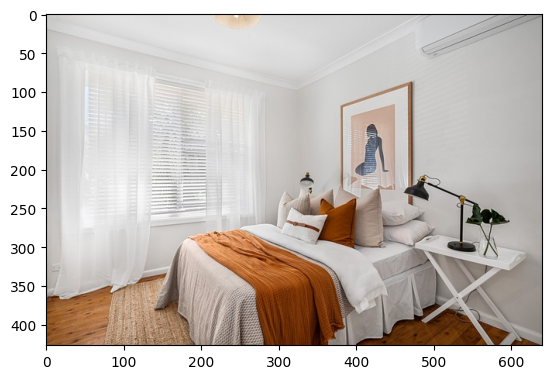

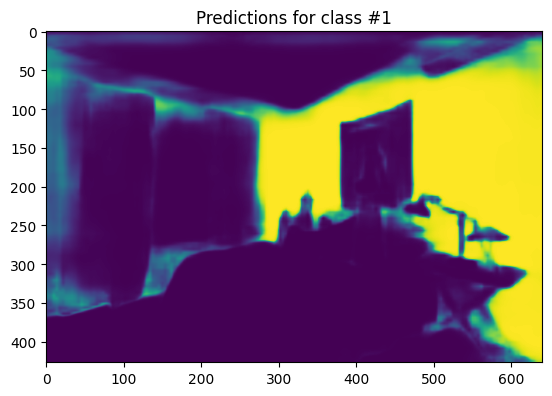

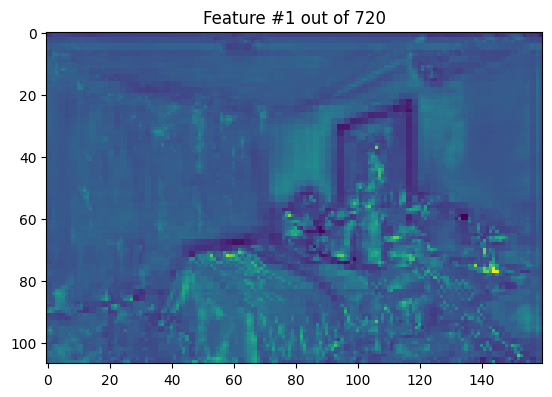

In [6]:
plt.imshow(img)
plt.show()

# Predictions will have shape (batch_size, h, w, dataset_output_classes)
predictions = hrnet_model.predict([img])
plt.imshow(predictions[0,:,:,1])
plt.title('Predictions for class #1')
plt.show() 
# Features will have shape (batch_size, h/4, w/4, 720)
features = hrnet_model.get_features([img])
plt.imshow(features[0,:,:,1])
plt.title('Feature #1 out of 720')
plt.show()